# **Ridge regresson from scratch**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("../DataSets/advertising.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


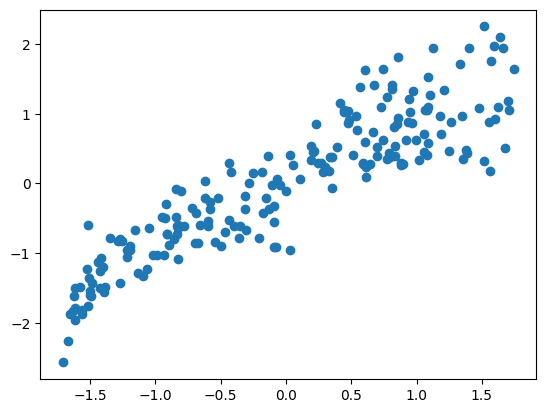

In [3]:
feature = df["TV"]
target = df["Sales"]
feature = (feature - np.mean(feature))/np.std(feature)
target = (target - np.mean(target))/np.std(target)
plt.scatter(feature,target)
plt.show()

# without taking care of overfitting

In [4]:
x_train = feature[:120]
y_train = target[:120]
x_test = feature[120:]
y_test = target[120:]

Slope (m):  0.8963111479518044
Intercept (c):  0.03973130865004886
RMSE: 0.48364794172357284


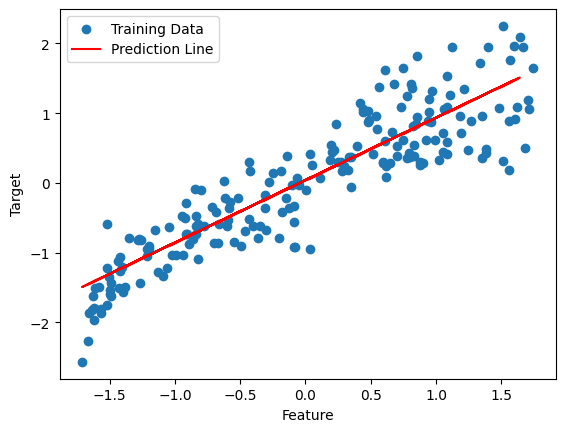

In [5]:
m = 0.01
c = 0.01
alpha = 0.01
lembda = 0.00001

for epoch in range(10000):
    y_pred_train = m * x_train + c

    dm = (-2/len(x_train)) * np.sum(x_train * (y_train - y_pred_train))
    dc = (-2/len(x_train)) * np.sum(y_train - y_pred_train)

    # ridge regularization
    m = m - alpha * (dm + lembda * m * m)
    c = c - alpha * dc

print("Slope (m): ", m)
print("Intercept (c): ", c)

y_pred = m * x_test + c

mse = np.mean((y_pred - y_test) ** 2)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

plt.scatter(feature, target, label="Training Data")
plt.plot(x_test, y_pred, color='red', label="Prediction Line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()
